In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [22]:

# Load the data
trips_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/trips.txt')
stop_times_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/stop_times.txt')
stops_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/stops.txt')
shapes_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/shapes.txt')
routes_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/routes.txt')
calendar_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/calendar.txt')
agency_df = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\DMRC_GTFS/agency.txt')


In [23]:
# Display the first few rows of each DataFrame
print(agency_df.head())
print(calendar_df.head())
print(stops_df.head())
print(trips_df.head())
print(stop_times_df.head())
print(routes_df.head())


  agency_id                   agency_name                      agency_url  \
0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   

  agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
0    Asia/Kolkata          NaN           NaN              NaN           NaN  
  service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0    weekday       1        1          1         1       1         0       0   
1   saturday       0        0          0         0       0         1       0   
2     sunday       0        0          0         0       0         0       1   

   start_date  end_date  
0    20190101  20251231  
1    20190101  20251231  
2    20190101  20251231  
   stop_id  stop_code       stop_name  stop_desc   stop_lat   stop_lon
0        1        NaN  Dilshad Garden        NaN  28.675991  77.321495
1        2        NaN         Jhilmil        NaN  28.675648  77.312393
2        3        NaN  Mansrover park        NaN  2

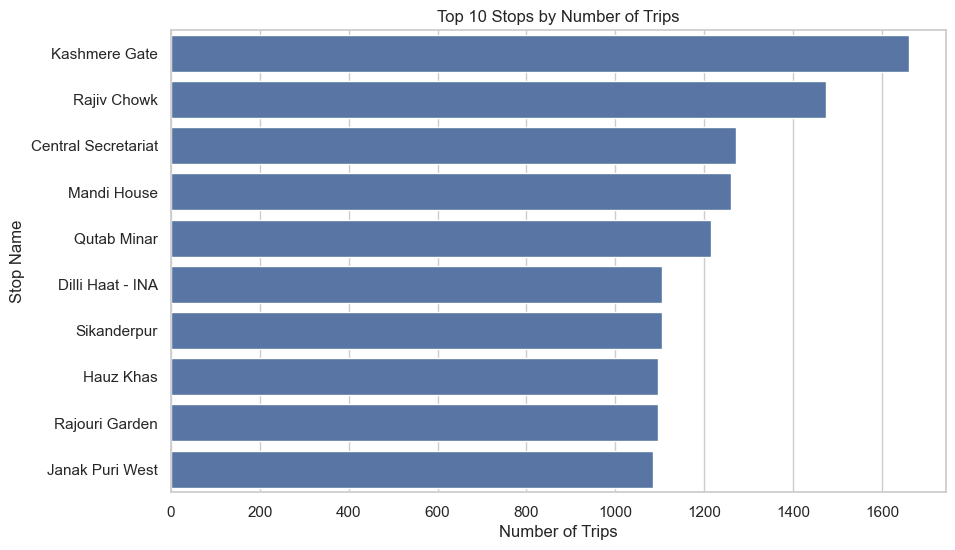

In [ ]:

# Top 10 Stops by Number of Trips
stop_trip_counts = stop_times_df.groupby('stop_id')['trip_id'].nunique().reset_index()
stop_trip_counts = stop_trip_counts.merge(stops_df[['stop_id', 'stop_name']], on='stop_id')
stop_trip_counts = stop_trip_counts.sort_values(by='trip_id', ascending=False)

top_stops = stop_trip_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_id', y='stop_name', data=top_stops)
plt.title('Top 10 Stops by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Stop Name')
plt.show()


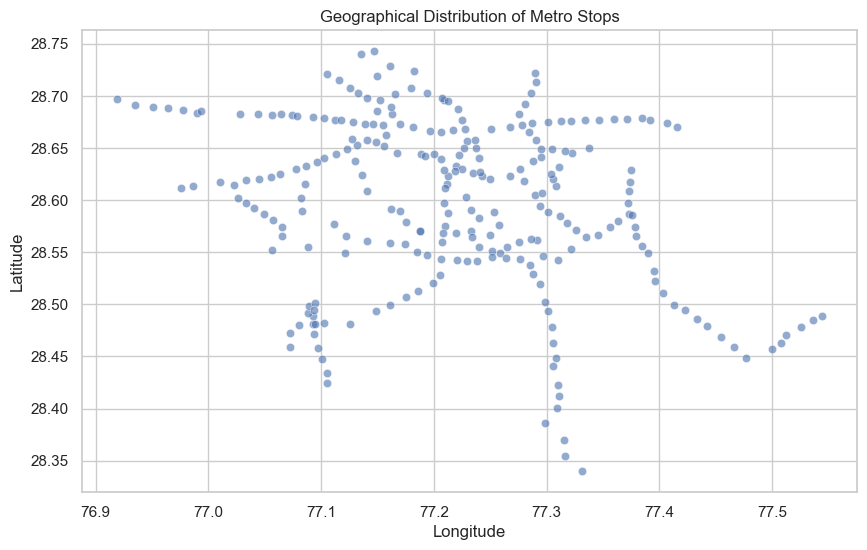

In [25]:
# Geographical Distribution of Metro Stops
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stops_df, x='stop_lon', y='stop_lat', alpha=0.6)
plt.title('Geographical Distribution of Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

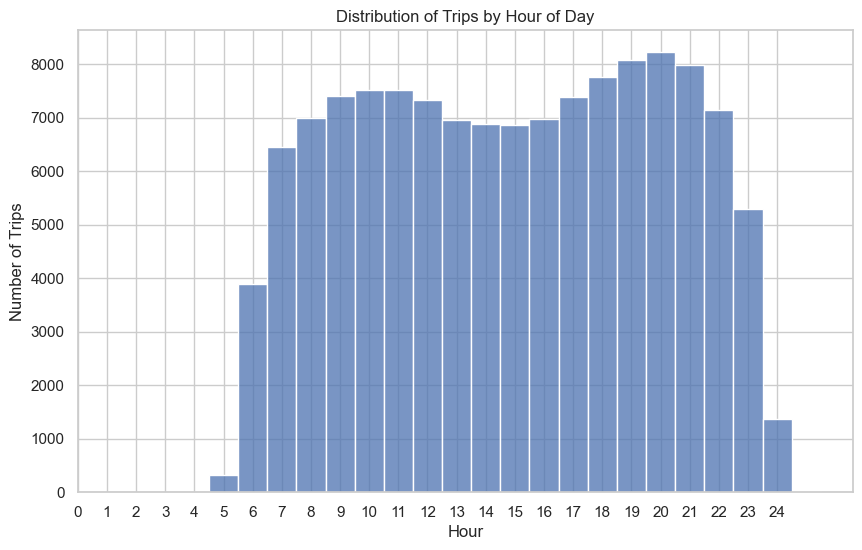

In [26]:
# Distribution of trips by hours per day    
stop_times_df['arrival_hour'] = stop_times_df['arrival_time'].apply(lambda x: int(x.split(':')[0]) if isinstance(x, str) else None)
plt.figure(figsize=(10, 6))
sns.histplot(stop_times_df['arrival_hour'].dropna(), bins=24, discrete=True)
plt.title('Distribution of Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 25))
plt.show()

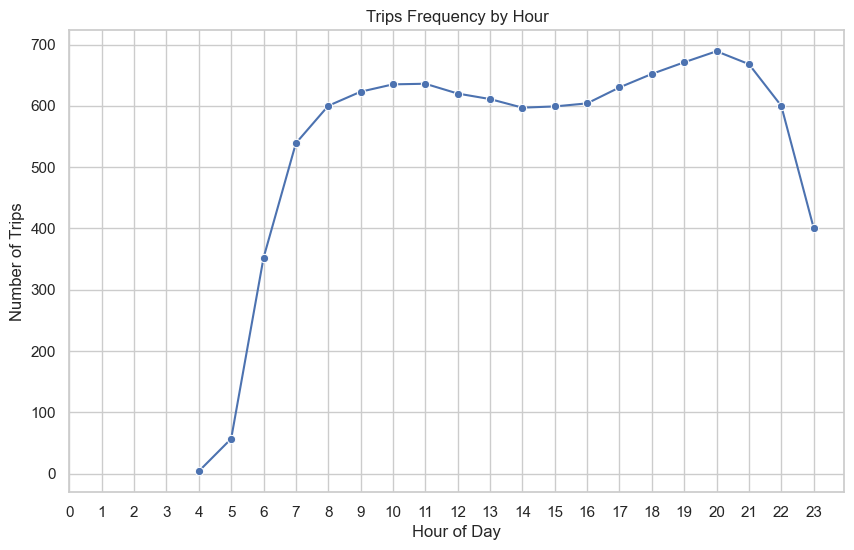

In [ ]:

# Trips Frequency by Hour
stop_times_df['arrival_time'] = pd.to_datetime(stop_times_df['arrival_time'], errors='coerce', format='%H:%M:%S')
stop_times_df['arrival_time'] = stop_times_df['arrival_time']
stop_times_df['arrival_hour'] = stop_times_df['arrival_time'].dt.hour

trip_counts_by_hour = stop_times_df.groupby('arrival_hour')['trip_id'].nunique().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='arrival_hour', y='trip_id', data=trip_counts_by_hour, marker='o', color='b')
plt.title('Trips Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()


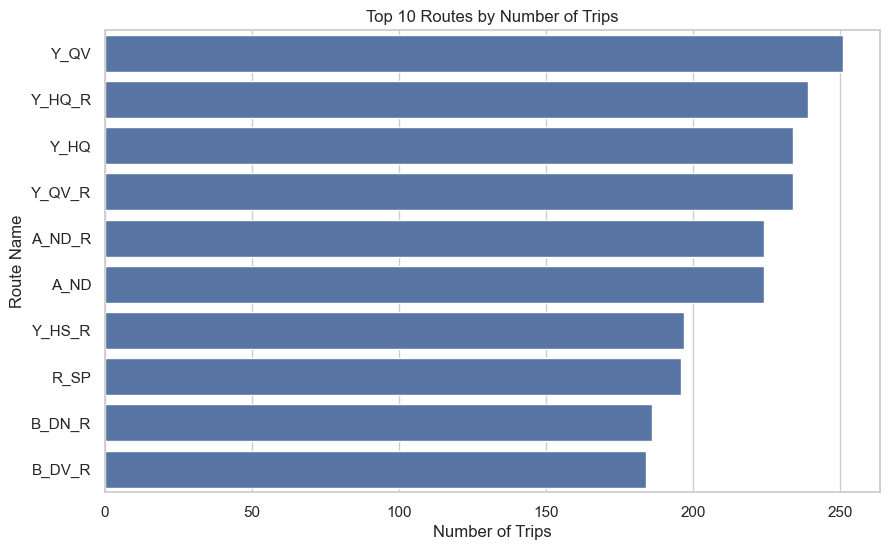

In [ ]:

# Top 10 Routes by Number of Trips
route_trip_counts = trips_df.groupby('route_id')['trip_id'].nunique().reset_index()
route_trip_counts = route_trip_counts.merge(routes_df[['route_id', 'route_short_name']], on='route_id')
route_trip_counts = route_trip_counts.sort_values(by='trip_id', ascending=False)


top_routes = route_trip_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_id', y='route_short_name', data=top_routes,)
plt.title('Top 10 Routes by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Route Name')
plt.show()
